In [230]:
# %matplotlib inline
import pandas as pd
from fbprophet import Prophet
import numpy as np
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use('fivethirtyeight')

In [231]:
raw_data = pd.read_csv("Online_Retail.csv")
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 08:26,3.39,17850.0,United Kingdom


In [232]:
sales_data = raw_data.drop(['InvoiceNo','Description','CustomerID','Country','UnitPrice'], axis = 1)
sales_data['InvoiceDate'] = pd.to_datetime(sales_data['InvoiceDate'])
print(sales_data.info())
sales_data.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 3 columns):
StockCode      541909 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 12.4+ MB
None


RangeIndex(start=0, stop=541909, step=1)

In [336]:
def extract_product(product_id,freq):
    #pull out all transactions of one product and drop StockCode
    product = sales_data.loc[sales_data['StockCode'] == product_id].drop('StockCode',axis=1)
    product=product.set_index(['InvoiceDate']) #Convert to timeseries 

    #DownSampling to a day
    day_summary = pd.DataFrame()
    day_summary['Quantity'] = product.Quantity.resample(freq).sum()
    day_summary = day_summary.fillna(0) #replacing NaN with 0
    day_summary = day_summary.clip(0) #replace -ve values with 0

    day_summary = day_summary['2010-12-12':]#trim as almost no data available before this date
    day_summary['Quantity']+=1#ti avoid -inf while taking log transformation 
#     print(day_summary.describe())
    #plot
    fig, ax1 = plt.subplots()
    ax1.plot(day_summary.index, day_summary['Quantity'])
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Quantity')
    # ax1.set_ylim(0,100)
    plt.show()
    return day_summary

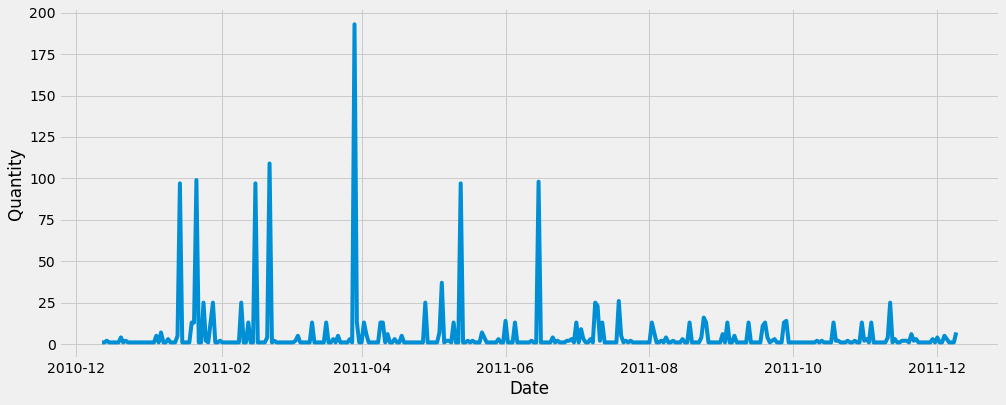

6.09169193385


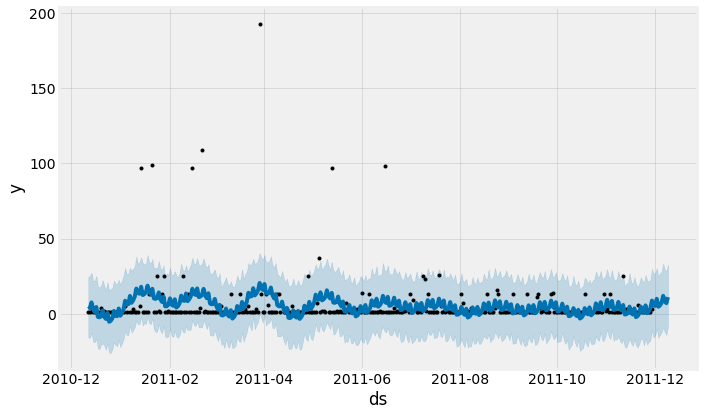

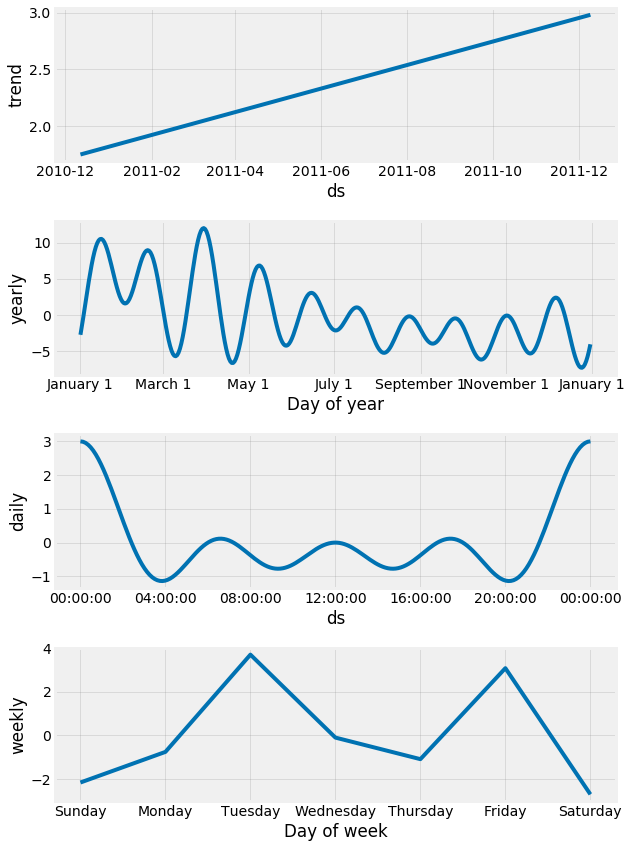

In [343]:
freq = 'D'
day_summary = extract_product('22613',freq)
# day_summary.head()

day_summary.reset_index(inplace=True)
day_summary = day_summary.rename(columns={'Quantity': 'y','InvoiceDate': 'ds'})
train,test = day_summary[:-10],day_summary[-10:]


my_model = Prophet(daily_seasonality=True,yearly_seasonality=True,weekly_seasonality=True)
my_model.fit(train)
future_dates = my_model.make_future_dataframe(periods=10,freq=freq)
forecast = my_model.predict(future_dates)
predicted = forecast[['ds', 'yhat']].tail(10)
print(np.sqrt(mean_squared_error(test.y,predicted.yhat)))
my_model.plot(forecast,uncertainty=True);
my_model.plot_components(forecast);

In [323]:
#required by prophet
# day_summary.reset_index(inplace=True)
# day_summary = day_summary.rename(columns={'Quantity': 'y','InvoiceDate': 'ds'})
# day_summary.head()

In [324]:
# train,test = day_summary[:-10],day_summary[-10:]

In [325]:
# train.head()

In [326]:
# test.head()

In [327]:
# my_model = Prophet(daily_seasonality=True,yearly_seasonality=True,weekly_seasonality=True)

In [328]:
# my_model.fit(train)

In [329]:
# future_dates = my_model.make_future_dataframe(periods=10,freq=freq)
# future_dates.tail()

In [330]:
# forecast = my_model.predict(future_dates)
# forecast.head()

In [331]:
# predicted = forecast[['ds', 'yhat']].tail(10)
# predicted

In [332]:
# test

In [333]:
# np.sqrt(mean_squared_error(test.y,predicted.yhat))

In [334]:
# my_model.plot(forecast,uncertainty=True);

In [335]:
# my_model.plot_components(forecast);